<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Non_Attacking_Queens_(Very_Hard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Non-Attacking Queens


Write a function that takes in a positive integer `n` and returns the number of non-attacking placements of `n` queens on an `n x n` chessboard.

A non-attacking placement is one where no queen can attack another queen in a single turn. In other words, it's a placement where no queen can move to the same position as another queen in a single turn.

In chess, queens can move any number of squares horizontally, vertically, or diagonally in a single turn.



```
+--+--+--+--+  
|  |Q |  |  |
+--+--+--+--+
|  |  |  |Q |
+--+--+--+--+
|Q |  |  |  |
+--+--+--+--+
|  |  |Q |  |
+--+--+--+--+
```



The chessboard above is an example of a non-attacking placement of 4 queens on a 4x4 chessboard. For reference, there are only 2 non-attacking placements of 4 queens on a 4x4 chessboard.

Sample Input

```
n = 4
```



Sample Output

```
2
```



# Solution 1

In [1]:
# Time O(n!*n)
# Space O(n)

def nonAttackingQueens(n):
  columnPlacements = [0] * n
  return getNumberOfNonAttackingQueenPlacements(0, columnPlacements, n)

def getNumberOfNonAttackingQueenPlacements(row, columnPlacements, boardSize):
  if row == boardSize:
    return 1

  validPlacements = 0
  for col in range(boardSize):
    if isValidPlactment(row, col, columnPlacements):
      columnPlacements[row] = col
      validPlacements += getNumberOfNonAttackingQueenPlacements(row + 1, columnPlacements, boardSize)

  return validPlacements

def isValidPlactment(row, col, columnPlacements):
  for previousRow in range(row):
    colToCheck = columnPlacements[previousRow]
    sameColumn =colToCheck == col
    onDiagonal = abs(colToCheck - col) == row - previousRow
    if sameColumn or onDiagonal:
      return False
  return True

In [2]:
nonAttackingQueens(4)

2

# Solution 2

- similar to solution 1 but use hash table

In [3]:
# Time O(n!)
# Space O(n)

def nonAttackingQueens(n):
	blockedColums = set()
	blockedUpDiagonals = set()
	blockedDownDiagonals = set()
	return getNumberOfNonAttackingQueenPlacements(0, blockedColums, blockedUpDiagonals, blockedDownDiagonals, n)

def getNumberOfNonAttackingQueenPlacements(row, blockedColums, blockedUpDiagonals, blockedDownDiagonals, boardSize):
	if row == boardSize:
		return 1

	validPlacements = 0
	for col in range(boardSize):
		if isValidPlactment(row, col, blockedColums, blockedUpDiagonals, blockedDownDiagonals):
			placeQueen(row, col, blockedColums, blockedUpDiagonals, blockedDownDiagonals)
			validPlacements += getNumberOfNonAttackingQueenPlacements(row + 1, blockedColums, blockedUpDiagonals, blockedDownDiagonals, boardSize)
			removeQueen(row, col, blockedColums, blockedUpDiagonals, blockedDownDiagonals)

	return validPlacements

def isValidPlactment(row, col, blockedColums, blockedUpDiagonals, blockedDownDiagonals):
	if col in blockedColums or \
		row + col in blockedUpDiagonals or \
		row - col in blockedDownDiagonals:
		return False
	return True

def placeQueen(row, col, blockedColums, blockedUpDiagonals, blockedDownDiagonals):
	blockedColums.add(col)
	blockedUpDiagonals.add(row + col)
	blockedDownDiagonals.add(row - col)

def removeQueen(row, col, blockedColums, blockedUpDiagonals, blockedDownDiagonals):
	blockedColums.remove(col)
	blockedUpDiagonals.remove(row + col)
	blockedDownDiagonals.remove(row - col)
	

In [4]:
nonAttackingQueens(0)

1

In [5]:
nonAttackingQueens(2)

0

In [6]:
nonAttackingQueens(4)

2

In [7]:
nonAttackingQueens(11)

2680

In [8]:
nonAttackingQueens(12)

14200

# Conceptual Note

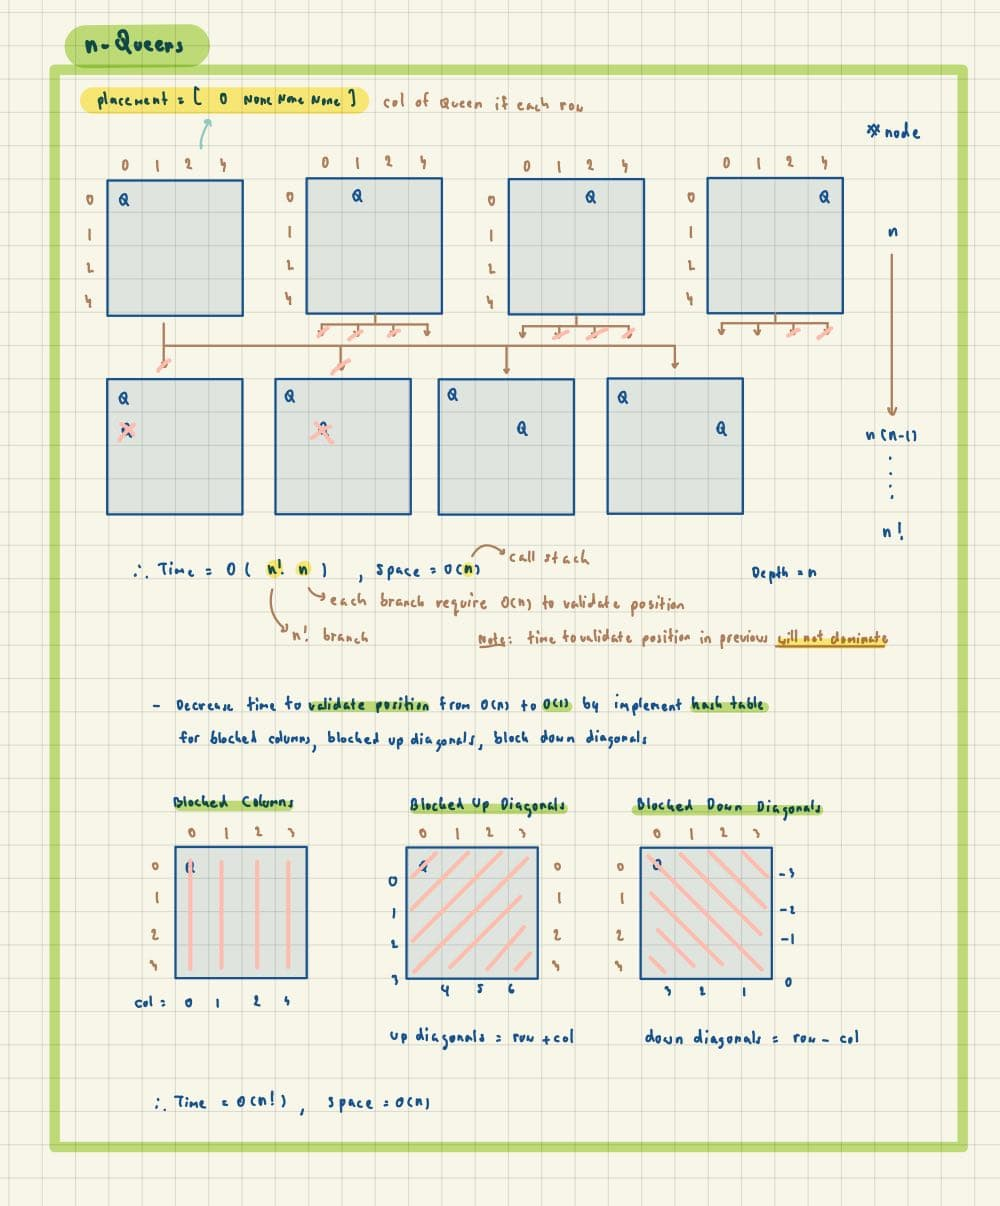